# Machine Learning Algorithms for Handwritten Digit Recognition

### Some algorithms to recognize digits : 

1. Deep Learning/CNN
2. SVM
3. Gaussian Naive Bayes
4. KNN
5. Decision Trees
6. Random Forests

* We use Sklearn's **load_digits** dataset. (A colleciton of 8x8 images ⟹ 64 features of digits)
  * The dataset contains a total of 1797 sample points.

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR) # DESCR provides a descrioption of the dataset

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

### Visualizing digits from the dataset

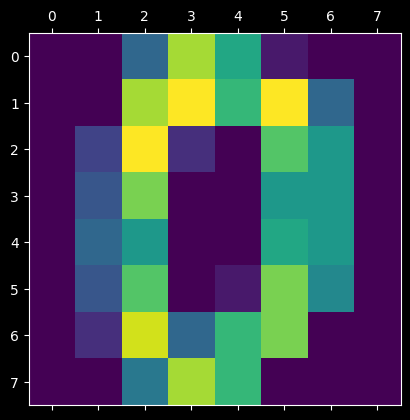

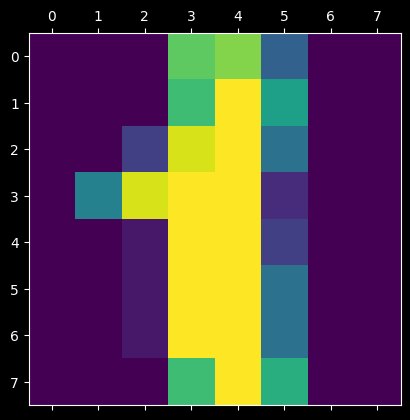

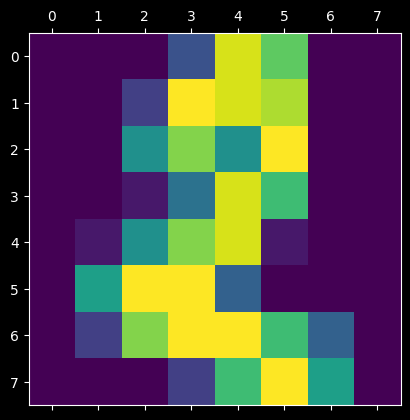

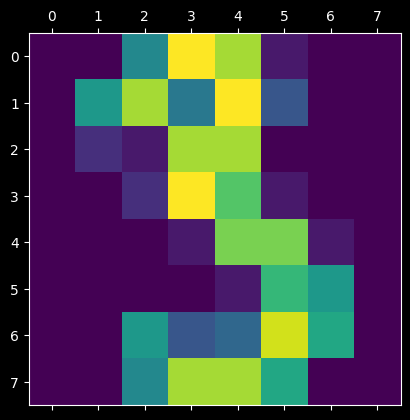

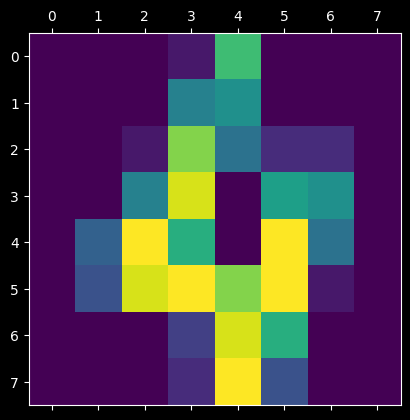

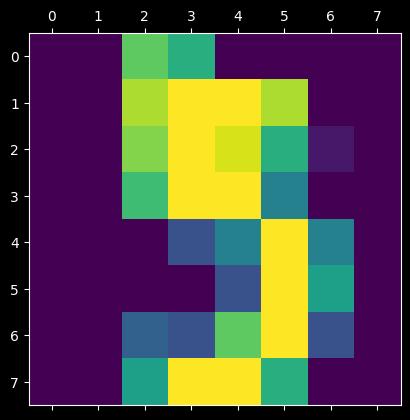

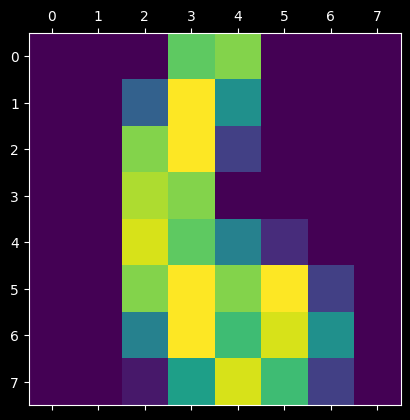

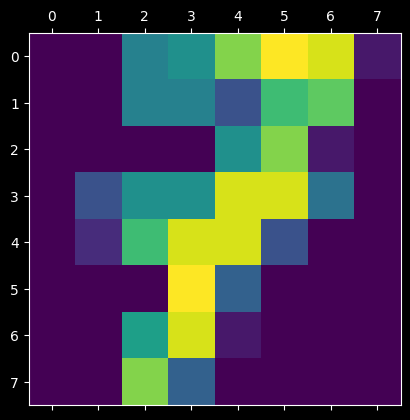

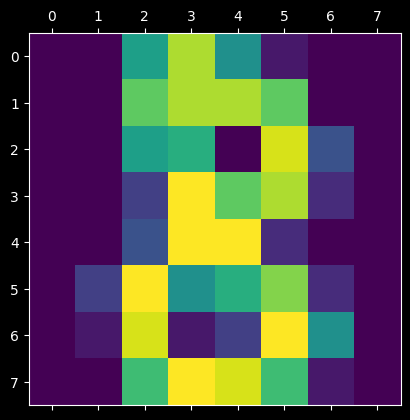

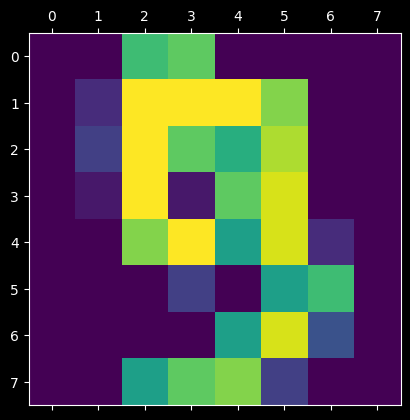

In [4]:
import matplotlib.pyplot as plt
# plt.gray()
plt.matshow(digits.images[0])
plt.show()
plt.matshow(digits.images[1])
plt.show()
plt.matshow(digits.images[2])
plt.show()
plt.matshow(digits.images[3])
plt.show()
plt.matshow(digits.images[4])
plt.show()
plt.matshow(digits.images[5])
plt.show()
plt.matshow(digits.images[6])
plt.show()
plt.matshow(digits.images[7])
plt.show()
plt.matshow(digits.images[8])
plt.show()
plt.matshow(digits.images[9])
plt.show()

target_names are the names of labels/classes

In [16]:
print(digits.target_names)


[0 1 2 3 4 5 6 7 8 9]


Importing train_test_split and performance metrics 


In [17]:
from sklearn import metrics 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

 creating a numpy array, reshaped so its first demension is the length of image
 ie : number of samples (n_samples)
 Reduced to 1797x64

In [18]:

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

Use train_test_split function to split our data

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size = 0.5, shuffle = False)

# Classifiers

* We will use different algorithms as classifiers, make predictions, print the classification report, print the confusion score and print the accuracy score

Classification report : precision, recall, f1-score, support, and accuracy is given

Confusion matrix : number of true and false positives and false negatives for each classifier is given

Classifiers used : 

1. Support Vector Machine
2. Gaussian Naive Bayes
3. Decision Trees
4. Random Forest
5. K Nearest Neighbors
6. Stochastic Gradient Descent

## 1. Support Vector Machines (SVM)

* Best


Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]


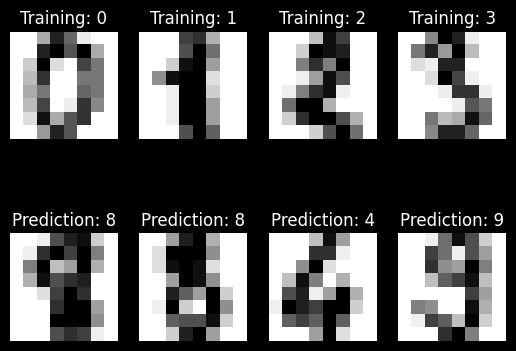

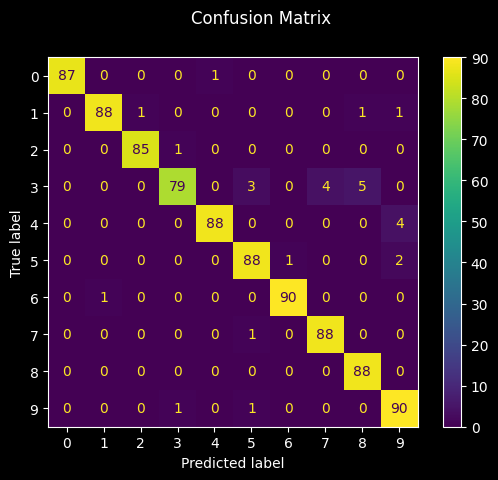

In [20]:
from sklearn import svm
svm_classifier = svm.SVC(gamma = 0.001)
svm_classifier.fit(X_train, y_train)

predicted = svm_classifier.predict(X_test)

_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)
    
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)
print("\nClassification report for classifier %s:\n%s\n" % (svm_classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.ConfusionMatrixDisplay.from_estimator(svm_classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
print("\nAccuracy of the Algorithm: ", svm_classifier.score(X_test, y_test))
plt.show()

## 2. Guassian Naive Bayes


Classification report for classifier GaussianNB():
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        88
           1       0.81      0.74      0.77        91
           2       0.87      0.84      0.85        86
           3       0.88      0.79      0.83        91
           4       1.00      0.73      0.84        92
           5       0.70      0.81      0.76        91
           6       0.96      0.99      0.97        91
           7       0.65      0.81      0.72        89
           8       0.61      0.76      0.68        88
           9       0.77      0.66      0.71        92

    accuracy                           0.81       899
   macro avg       0.82      0.81      0.81       899
weighted avg       0.82      0.81      0.81       899



Confusion matrix:
[[84  0  0  0  0  2  0  0  1  1]
 [ 0 67  2  0  0  0  0  2 13  7]
 [ 0  8 72  0  0  1  2  0  3  0]
 [ 0  2  2 72  0  2  0  2  9  2]
 [ 1  0  0  0 67  0  0 22  1  1]
 [ 0

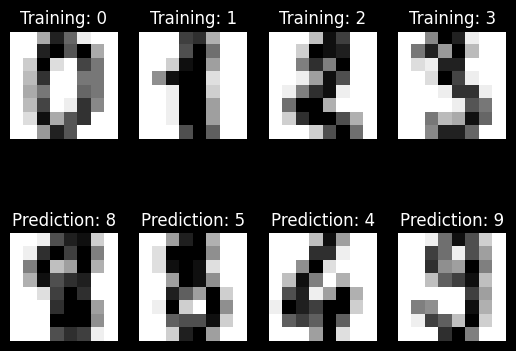

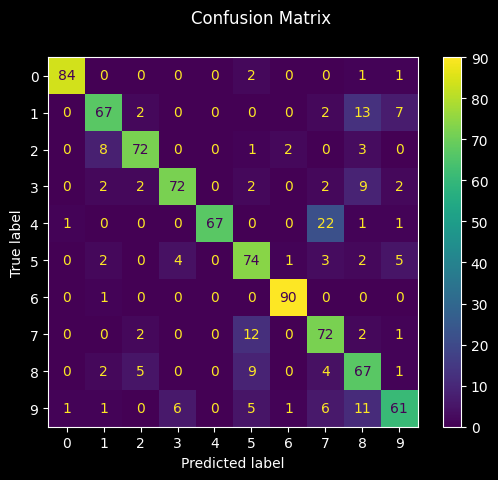

In [24]:
from sklearn.naive_bayes import GaussianNB
GNB_classifier = GaussianNB()
GNB_classifier.fit(X_train, y_train)
predicted = GNB_classifier.predict(X_test)
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)
    
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)
print("\nClassification report for classifier %s:\n%s\n" % (GNB_classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.ConfusionMatrixDisplay.from_estimator(GNB_classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
print("\nAccuracy of the Algorithm: ", GNB_classifier.score(X_test, y_test))
plt.show()

## 3. Decision Trees


Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        88
           1       0.77      0.62      0.68        91
           2       0.89      0.74      0.81        86
           3       0.66      0.76      0.70        91
           4       0.79      0.78      0.79        92
           5       0.61      0.76      0.67        91
           6       0.88      0.92      0.90        91
           7       0.84      0.58      0.69        89
           8       0.60      0.67      0.63        88
           9       0.68      0.75      0.71        92

    accuracy                           0.75       899
   macro avg       0.76      0.75      0.75       899
weighted avg       0.76      0.75      0.75       899



Confusion matrix:
[[79  0  0  0  1  3  2  0  2  1]
 [ 0 56  5  7  2  0  0  4 10  7]
 [ 1  3 64  8  0  1  3  0  4  2]
 [ 0  2  0 69  0  4  0  3 10  3]
 [ 6  0  0  0 72  2  3  1

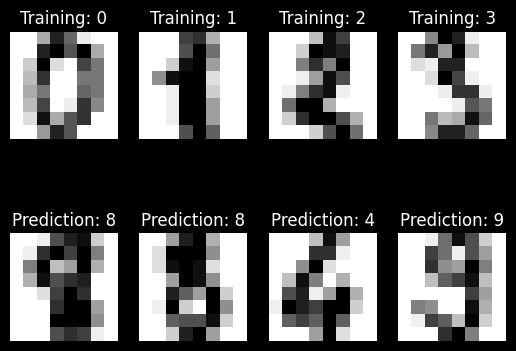

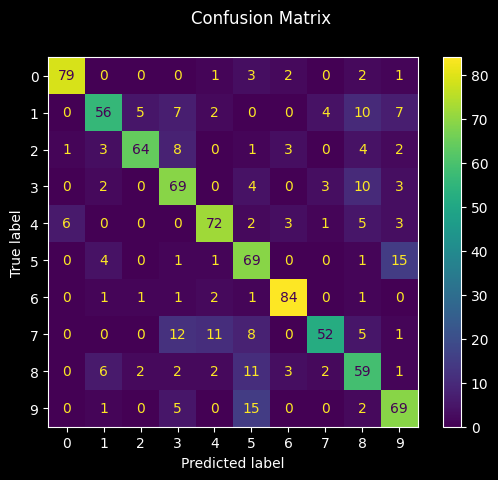

In [25]:
from sklearn import tree
dt_classifier = tree.DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
predicted = dt_classifier.predict(X_test)
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)
    
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)
print("\nClassification report for classifier %s:\n%s\n" % (dt_classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.ConfusionMatrixDisplay.from_estimator(dt_classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
print("\nAccuracy of the Algorithm: ", dt_classifier.score(X_test, y_test))
plt.show()

## 4. Random Forest


Classification report for classifier RandomForestClassifier(max_depth=2, random_state=0):
              precision    recall  f1-score   support

           0       0.87      0.99      0.93        88
           1       0.90      0.42      0.57        91
           2       0.66      0.80      0.72        86
           3       0.55      0.82      0.66        91
           4       0.91      0.82      0.86        92
           5       0.74      0.62      0.67        91
           6       0.87      0.99      0.93        91
           7       0.70      1.00      0.82        89
           8       0.92      0.26      0.41        88
           9       0.74      0.82      0.77        92

    accuracy                           0.75       899
   macro avg       0.79      0.75      0.73       899
weighted avg       0.79      0.75      0.73       899



Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 38  6 13  4  8  0 11  2  9]
 [ 1  0 69 13  0  0  0  2  0  1]
 [ 1  0  7 75  0  0  1  6  0  1

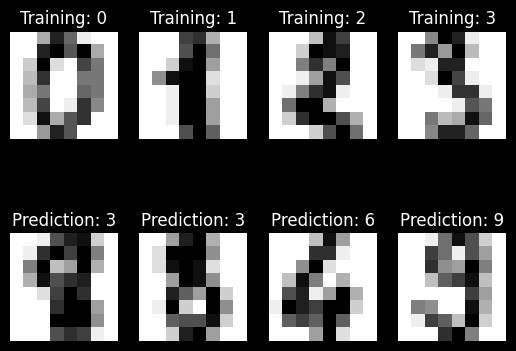

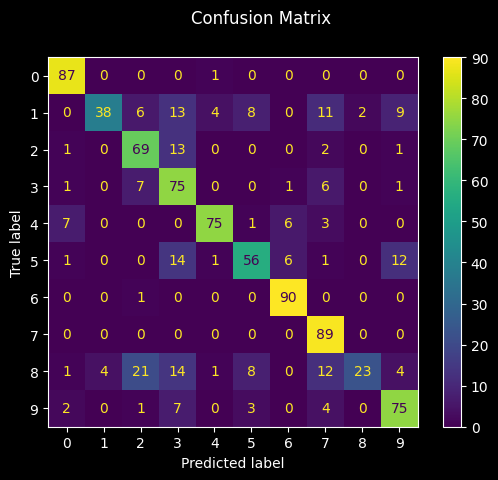

In [26]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(max_depth = 2, random_state = 0)
RF_classifier.fit(X_train, y_train)
predicted = RF_classifier.predict(X_test)
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)
    
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)
print("\nClassification report for classifier %s:\n%s\n" % (RF_classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.ConfusionMatrixDisplay.from_estimator(RF_classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
print("\nAccuracy of the Algorithm: ", RF_classifier.score(X_test, y_test))
plt.show()

## 5. K Nearest Neighbors (KNN)


Classification report for classifier KNeighborsClassifier(metric='euclidean'):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        88
           1       0.95      0.98      0.96        91
           2       0.98      0.93      0.95        86
           3       0.89      0.90      0.90        91
           4       1.00      0.95      0.97        92
           5       0.96      0.98      0.97        91
           6       0.99      1.00      0.99        91
           7       0.95      1.00      0.97        89
           8       0.95      0.90      0.92        88
           9       0.91      0.92      0.92        92

    accuracy                           0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899



Confusion matrix:
[[88  0  0  0  0  0  0  0  0  0]
 [ 0 89  0  0  0  0  0  0  1  1]
 [ 1  0 80  5  0  0  0  0  0  0]
 [ 0  0  1 82  0  2  0  3  2  1]
 [ 0  0  

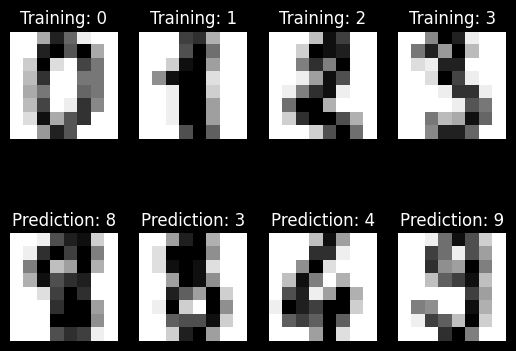

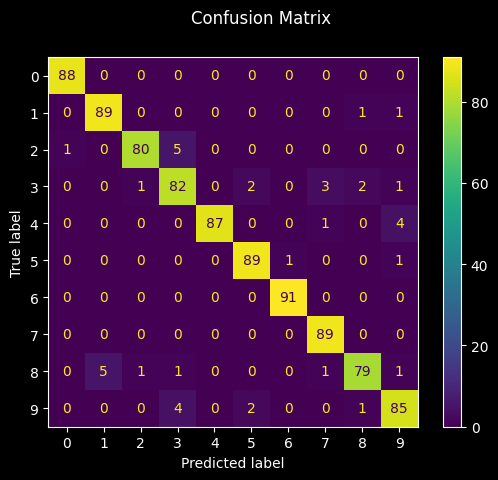

In [30]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
KNN_classifier.fit(X_train, y_train)
predicted = KNN_classifier.predict(X_test)

_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)
    
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)

print("\nClassification report for classifier %s:\n%s\n" % (KNN_classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.ConfusionMatrixDisplay.from_estimator(KNN_classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
print("\nAccuracy of the Algorithm: ", KNN_classifier.score(X_test, y_test))
plt.show()

## 6. Stochastic gradient Descent


Classification report for classifier SGDClassifier(max_iter=100):
              precision    recall  f1-score   support

           0       0.91      0.98      0.95        88
           1       0.95      0.81      0.88        91
           2       0.99      0.97      0.98        86
           3       0.96      0.86      0.91        91
           4       0.99      0.88      0.93        92
           5       0.86      0.96      0.91        91
           6       0.92      0.99      0.95        91
           7       1.00      0.90      0.95        89
           8       0.87      0.90      0.88        88
           9       0.78      0.93      0.85        92

    accuracy                           0.92       899
   macro avg       0.92      0.92      0.92       899
weighted avg       0.92      0.92      0.92       899



Confusion matrix:
[[86  0  0  0  0  1  1  0  0  0]
 [ 1 74  0  2  1  0  1  0  6  6]
 [ 2  0 83  0  0  0  0  0  0  1]
 [ 0  0  0 78  0  4  0  0  6  3]
 [ 3  2  0  0 81  0  4

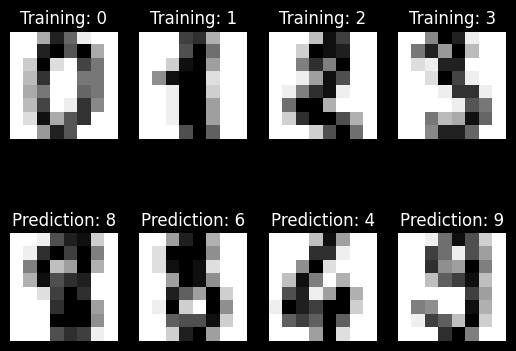

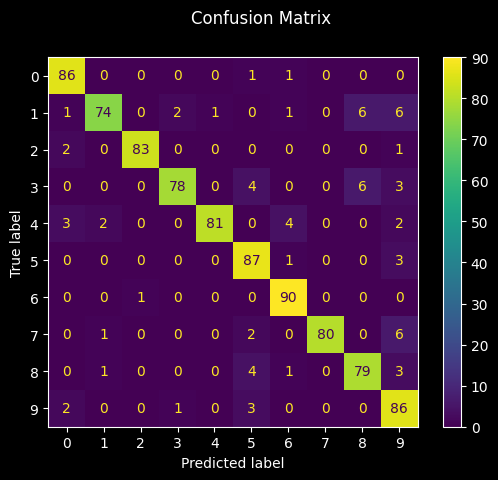

In [36]:
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(loss="hinge", penalty="l2", max_iter=100)
sgd_classifier.fit(X_train, y_train)
predicted = sgd_classifier.predict(X_test)
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)
    
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)
print("\nClassification report for classifier %s:\n%s\n" % (sgd_classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.ConfusionMatrixDisplay.from_estimator(sgd_classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
print("\nAccuracy of the Algorithm: ", sgd_classifier.score(X_test, y_test))
plt.show()

These are some of the basic classification algorithms to get started with handwritten digit recognition.